In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.svm import SVR
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.Regressor import StackingCVRegressor #
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('data.csv')
df.drop([106 , 107], inplace=True)
df = df[df.TYPE!= 'NIL']
X = df.drop('TYPE', axis=1)
y = df[['TYPE']]


In [3]:
df.isna().mean().round(4)*100

IDENTIF      0.00
RIVER        0.00
LOCATION     0.95
ERECTED      0.00
PURPOSE      0.00
LENGTH      22.86
LANES       12.38
CLEAR-G      1.90
T-OR-D       2.86
MATERIAL     0.00
SPAN        12.38
REL-L        4.76
TYPE         0.00
dtype: float64

In [4]:
from sklearn.preprocessing import OrdinalEncoder
# encoder = OrdinalEncoder()
# #list of categorical variables
# ordinal_enc_dict = {}

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object','category']).columns

In [5]:
num_features

Index(['LOCATION', 'LANES'], dtype='object')

In [6]:
cat_features

Index(['IDENTIF', 'RIVER', 'ERECTED', 'PURPOSE', 'LENGTH', 'CLEAR-G', 'T-OR-D',
       'MATERIAL', 'SPAN', 'REL-L'],
      dtype='object')

In [7]:
from fancyimpute import KNN
ordinal_enc_dict = {}

for col_name in X[cat_features]:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = X[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    X.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

KNN_imputer = KNN()

# Impute and round the users DataFrame
X.iloc[:, :] = np.round(KNN_imputer.fit_transform(X))


X

Using TensorFlow backend.


Imputing row 1/105 with 1 missing, elapsed time: 0.000
Imputing row 101/105 with 0 missing, elapsed time: 0.078


,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L
0,0.0,1.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,17.0,0.0,25.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
2,28.0,0.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
3,50.0,0.0,29.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
4,61.0,1.0,23.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
5,72.0,0.0,27.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
6,83.0,0.0,28.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0
7,94.0,1.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0
8,1.0,0.0,39.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0
9,8.0,0.0,29.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0


In [8]:
X.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L
0,0.0,1.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,17.0,0.0,25.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
2,28.0,0.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
3,50.0,0.0,29.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
4,61.0,1.0,23.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0


In [9]:
cat_features
# X.dtypes

Index(['IDENTIF', 'RIVER', 'ERECTED', 'PURPOSE', 'LENGTH', 'CLEAR-G', 'T-OR-D',
       'MATERIAL', 'SPAN', 'REL-L'],
      dtype='object')

In [10]:
# Loop over the column names in users
for col_name in cat_features:
    
    # Reshape the data
    reshaped = X[col_name].values.reshape(-1, 1)
#     print(reshaped)
    # Perform inverse transform of the ordinally encoded columns
    X[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)
X

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L
0,E1,M,3.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S
1,E2,A,25.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S
2,E3,A,39.0,CRAFTS,AQUEDUCT,LONG,1.0,N,THROUGH,WOOD,MEDIUM,S
3,E5,A,29.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S
4,E6,M,23.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,MEDIUM,S
5,E7,A,27.0,CRAFTS,HIGHWAY,SHORT,2.0,N,THROUGH,WOOD,MEDIUM,S
6,E8,A,28.0,CRAFTS,AQUEDUCT,MEDIUM,1.0,N,THROUGH,IRON,SHORT,S
7,E9,M,3.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,IRON,SHORT,S
8,E10,A,39.0,CRAFTS,AQUEDUCT,MEDIUM,1.0,N,DECK,WOOD,MEDIUM,S
9,E11,A,29.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,MEDIUM,S


In [11]:
!pip install ppscore

In [12]:
X.columns

Index(['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES',
       'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L'],
      dtype='object')

In [13]:
total = pd.DataFrame()
total = X
total['TYPE'] = y['TYPE']

In [14]:
total.head()


,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,CRAFTS,AQUEDUCT,LONG,1.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
3,E5,A,29.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [18]:
import ppscore as pps
pps.predictors(total, "TYPE")

,x,ppscore,y,task,metric,baseline_score,model_score
0,ERECTED,0.279374,TYPE,classification,weighted F1,0.247491,0.457723
1,MATERIAL,0.242353,TYPE,classification,weighted F1,0.247491,0.429864
2,CLEAR-G,0.197735,TYPE,classification,weighted F1,0.247491,0.396288
3,LANES,0.160320,TYPE,classification,weighted F1,0.247491,0.368133
4,LOCATION,0.129915,TYPE,classification,weighted F1,0.247491,0.345254
5,REL-L,0.116450,TYPE,classification,weighted F1,0.247491,0.335121
6,T-OR-D,0.112014,TYPE,classification,weighted F1,0.247491,0.331783
7,PURPOSE,0.068898,TYPE,classification,weighted F1,0.247491,0.299338
8,SPAN,0.032958,TYPE,classification,weighted F1,0.247491,0.272292
9,IDENTIF,0.000000,TYPE,classification,weighted F1,0.000000,0.000000


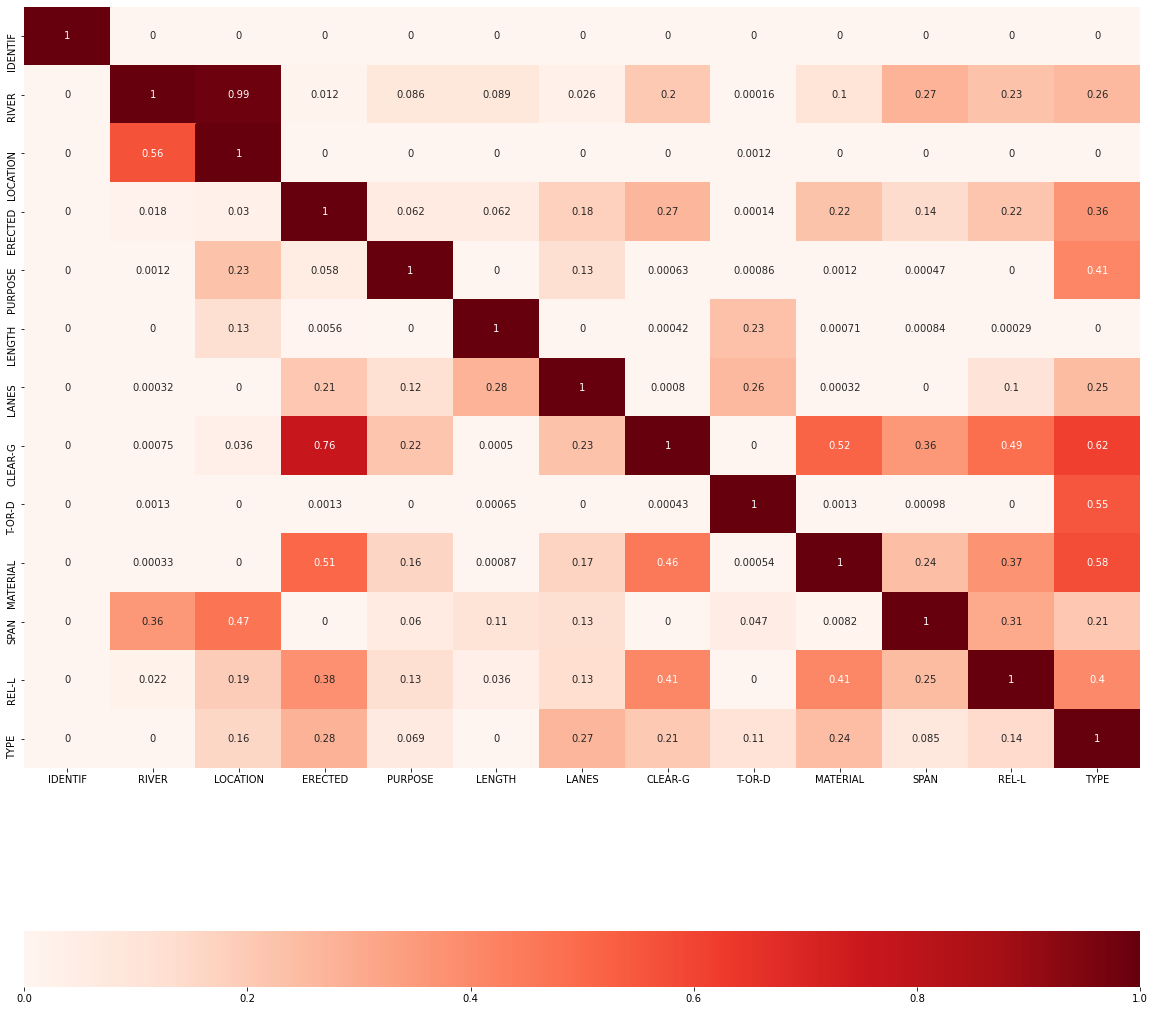

In [19]:
import ppscore as pps
import seaborn as sns
import numpy as np

# Converting the spark dataframs to Pandas
plt.figure(figsize=(20,20))

# Finding the correlation matrix using pps.matrix()
df_matrix = pps.matrix(df)

# Displaying the results using seaborn heatmaps
display(sns.heatmap(df_matrix, annot=True, cmap=plt.cm.Reds,fmt='.2g',cbar_kws= {'orientation': 'horizontal'} ))

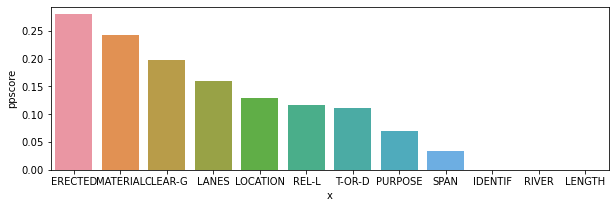

In [20]:
import seaborn as sns
plt.figure(figsize=(10,3))
df_predictors = pps.predictors(total, y="TYPE")
display(sns.barplot(data=df_predictors, x="x", y="ppscore"))

In [21]:
total.columns


Index(['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES',
       'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE'],
      dtype='object')

In [22]:
X = X[[ 'LOCATION', 'ERECTED', 'PURPOSE', 'LANES',
       'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L']]

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# le = le.inverse_transform
y['TYPE'] = le.fit_transform(y['TYPE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)
# X_train.head()
# print(le.inverse_transform(y['TYPE']))
# print(y['TYPE'])

In [24]:
X_train.columns

Index(['LOCATION', 'ERECTED', 'PURPOSE', 'LANES', 'CLEAR-G', 'T-OR-D',
       'MATERIAL', 'SPAN', 'REL-L'],
      dtype='object')

In [25]:
num_cols_ind = []

num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object','category']).columns

for key in num_features:
    ind = X_train.columns.get_loc(key)
    num_cols_ind.append(ind)
    
cat_cols_ind = []
for key in cat_features:
    ind = X_train.columns.get_loc(key)
    cat_cols_ind.append(ind)

In [26]:
from imblearn.over_sampling import SMOTENC, SVMSMOTE, BorderlineSMOTE, ADASYN
from imblearn.pipeline import make_pipeline as make_pipeline_imb

balancing_smote = SMOTENC(categorical_features=list(cat_cols_ind))
# balancing_smote.fit_resample(X_train, y_train)
from sklearn.preprocessing import LabelEncoder, StandardScaler

smote_nc = SMOTENC(categorical_features=cat_cols_ind, random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)
X_resampled.head()

,LOCATION,ERECTED,PURPOSE,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L
0,26.0,EMERGING,HIGHWAY,2.0,G,THROUGH,STEEL,MEDIUM,F
1,28.0,CRAFTS,RR,2.0,N,THROUGH,IRON,SHORT,S
2,13.0,MATURE,RR,2.0,G,THROUGH,STEEL,LONG,F
3,28.0,CRAFTS,AQUEDUCT,1.0,N,THROUGH,IRON,SHORT,S
4,40.0,MODERN,HIGHWAY,4.0,G,DECK,STEEL,MEDIUM,S-F


In [27]:
print(X_resampled.shape)
print(X_train.shape)

(174, 9)
(70, 9)


In [28]:
n_estimators = [50,100]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [10,15]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3]
# Method of selecting samples for training each tree
bootstrap = [True] 

# {'stackingcvclassifier__randomforestclassifier__bootstrap': True,
#  'stackingcvclassifier__randomforestclassifier__max_depth': 15,
#  'stackingcvclassifier__randomforestclassifier__max_features': 'auto', 
#  'stackingcvclassifier__randomforestclassifier__min_samples_leaf': 1, 
#  'stackingcvclassifier__randomforestclassifier__min_samples_split': 5,
#  'stackingcvclassifier__randomforestclassifier__n_estimators': 100}

In [42]:
pipe_stack.get_params()



{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    Index(['LOCATION', 'LANES'], dtype='object')),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    Index(['ERECTED', 'PURPOSE', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L'], dtype='object'))])),
  ('stackingcvclassifier',
   StackingCVClassifier(classifiers=[RandomForestClassifier(class_weight='balanced_subsample',
                                                            n_jobs=-1,
                                                            random_state=1000),
                                     XGBClassifier(base_score=None, booster=None,
                                                   colsample_bylevel=None,
                                                   co

In [50]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import NuSVC, SVC

num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object','category']).columns

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return roc_auc_score(y_test, y_pred, average=average)

ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)
scaler = StandardScaler()

rf_model = RandomForestClassifier(n_jobs = -1, random_state = 1000, class_weight = "balanced_subsample")
xgb_model = xgb.XGBClassifier()

knn_model = KNeighborsClassifier(n_neighbors=3)

preprocessing = make_column_transformer(
                                        (scaler,num_features)
                                        ,(ohe,cat_features)
                                        ,remainder='passthrough')

# preprocessing = ColumnTransformer(transformers = [
#                                         ('scaling',scaler,num_features)
#                                         ,('One-hot-encoding',ohe,cat_features)
#                                         ,remainder='passthrough')])

classifier_labels = ["rf_model", "xgb_model", "knn_model"]
classifiers = {"rf_model": rf_model,
               "xgb_model": xgb_model,
               "knn_model": knn_model,
                }
# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)

# Make pipeline
    stacking_model = StackingCVClassifier(classifiers=classifier_combo, 
                                meta_classifier=SVC(probability = True),
                                random_state=42, n_jobs = -1)

    pipe_stack = make_pipeline(preprocessing, stacking_model)
    # pipe_stack = Pipeline(steps = [('pre',preprocessing),('stackingcvclassifier', stacking_model)])

    params = {
                   'stackingcvclassifier__randomforestclassifier__n_estimators': n_estimators,  #randomforestregressor__bootstrap
                   'stackingcvclassifier__randomforestclassifier__max_features': max_features,
                   'stackingcvclassifier__randomforestclassifier__max_depth': max_depth,
                   'stackingcvclassifier__randomforestclassifier__min_samples_split': min_samples_split,
                   'stackingcvclassifier__randomforestclassifier__min_samples_leaf': min_samples_leaf,
                   'stackingcvclassifier__randomforestclassifier__bootstrap': bootstrap,
#                    'stackingcvclassifier__kneighborsclassifier__n_neighbors':[3,5],
#                    'stackingcvclassifier__meta_classifier__n_estimators': [10, 50, 100],
#                    'stackingcvclassifier__meta_classifier__learning_rate': [0.5, 1],
                    'stackingcvclassifier__xgbclassifier__learning_rate' : [0.5,0.1],
                     'stackingcvclassifier__xgbclassifier__n_estimators': [100, 200],
                    'stackingcvclassifier__meta_classifier__kernel': ["'linear", "rbf", "poly"],
                      'stackingcvclassifier__meta_classifier__C': [1, 2],
                      'stackingcvclassifier__meta_classifier__degree': [3, 4, 5],
                      'stackingcvclassifier__meta_classifier__probability': [True]

             }

    grid = GridSearchCV(
        verbose=1,#1
        estimator=pipe_stack, 
        param_grid=params, 
        cv=3,
        refit=True,
        n_jobs= -1
    )



    grid.fit(X_resampled, y_resampled.values.ravel())
    
    y_pred = grid.predict(X_test)
# [:,1]
    
# Getting AUC
# auc = metrics.roc_auc_score(y_test, y_pred,multi_class='ovo')

# Print results
# print(f"AUC of stack {combo}: {auc:.3f}")


    auc = multiclass_roc_auc_score(y_test, y_pred)
    print(f"AUC of stack {combo}: {auc:.3f}")




Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 34.0min finished


AUC of stack ('rf_model', 'xgb_model'): 0.731
Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 33.9min finished


AUC of stack ('rf_model', 'knn_model'): 0.731
Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 35.1min finished


AUC of stack ('xgb_model', 'knn_model'): 0.731
Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 36.4min finished


AUC of stack ('rf_model', 'xgb_model', 'knn_model'): 0.745


In [54]:
print ("score = %3.2f" %(grid.best_score_))
print (grid.best_params_)

score = 0.80
{'stackingcvclassifier__meta_classifier__C': 2, 'stackingcvclassifier__meta_classifier__degree': 3, 'stackingcvclassifier__meta_classifier__kernel': 'rbf', 'stackingcvclassifier__meta_classifier__probability': True, 'stackingcvclassifier__randomforestclassifier__bootstrap': True, 'stackingcvclassifier__randomforestclassifier__max_depth': 10, 'stackingcvclassifier__randomforestclassifier__max_features': 'auto', 'stackingcvclassifier__randomforestclassifier__min_samples_leaf': 3, 'stackingcvclassifier__randomforestclassifier__min_samples_split': 3, 'stackingcvclassifier__randomforestclassifier__n_estimators': 50, 'stackingcvclassifier__xgbclassifier__learning_rate': 0.5, 'stackingcvclassifier__xgbclassifier__n_estimators': 200}


In [51]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

cat_features = X_train.select_dtypes(include=['object','category']).columns
for col in cat_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_train[col] = X_train[col].astype('category')
    
# rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight=’balanced’)
# boruta_selector = BorutaPy(rf_model, n_estimators='auto', verbose=2)
# # x=df.iloc[:,:].values
# # y=dflabel.iloc[:,0].values
# boruta_selector.fit(X_train,y_train)
# # print(“==============BORUTA==============”)
# print (boruta_selector.n_features_)

rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=1000)

In [52]:
rf_model.feature_importances_
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X_train.columns,
                                   columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
LOCATION,0.276153
MATERIAL,0.142267
ERECTED,0.141294
LANES,0.129446
T-OR-D,0.088899
PURPOSE,0.071853
REL-L,0.060875
SPAN,0.053739
CLEAR-G,0.035473


In [92]:
metrics.roc_curve(y_test, y_pred)

TypeError: roc_curve() got an unexpected keyword argument 'multi_class'

In [89]:
# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]
# y_pred  = grid.predict(X_test)
# # Getting AUC
auc = metrics.roc_auc_score(y_test.values.ravel(), y_pred,multi_class="ovo", average="macro")

# # # Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")
# y_pred

AttributeError: module 'sklearn.metrics' has no attribute 'roc_score'

In [81]:
y_test.values.ravel()

array([3, 0, 3, 0, 5, 3, 3, 3, 3, 2, 3, 4, 1, 3, 4, 1, 5, 5, 0, 2, 3, 4,
       3, 0, 1, 3, 3, 3, 2, 3, 5, 3, 5, 4, 1], dtype=int64)

In [59]:
from sklearn.metrics import f1_score

y_pred = grid.predict(X_test)
f1_score(le.inverse_transform(y_test), y_pred, average='macro')

0.5086580086580086

In [62]:
le.inverse_transform(y_pred)

array([0, 1, 3, 0, 5, 3, 3, 1, 3, 1, 3, 1, 2, 3, 4, 4, 5, 5, 0, 2, 4, 5,
       3, 0, 2, 3, 3, 3, 0, 3, 5, 3, 5, 1, 3])

In [129]:
pipe.fit(X_train, y_train)
print("Best score : %f" % pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
f1_score(y_test, y_pred, average='macro')

C:\Users\deepti\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Best score : 0.685714


0.5011904761904762

In [64]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.0-py3-none-any.whl size=284186 sha256=7b6f380b804926fb5d527cfa00689144e9e4f9b9d78c03028029dcfa3020c9f5
  Stored in directory: c:\users\deepti\appdata\local\pip\cache\wheels\05\1a\3f\6b78b5cf3a5b8ed95a487c2539755c9e97907e53594dfe8e35
Successfully built lime


In [69]:
cat_features
cat_cols_ind

[1, 2, 4, 5, 6, 7, 8]

In [70]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'classification',
                                                   feature_names = X_train.columns,
                                                   categorical_features = cat_cols_ind, 
                                                   categorical_names = cat_features
#                                                    discretize_continuous = False
                                                  )
                                                   
np.random.seed(42)
exp = explainer.explain_instance(X_train.values[31], grid.predict, num_features = 5)
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

exp = explainer.explain_instance(X_train.values[85], rf.predict, num_features = 5)
exp.show_in_notebook(show_all=False)

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [72]:
def prob(data):
    return np.array(list(zip(1-grid.predict(data),model.predict(data))))

explainer = lime.lime_tabular.LimeTabularExplainer(X[grid.feature_name()].astype(int).values,  
mode='classification',training_labels=y['TYPE'],feature_names=X.columns)

feat = X.columns
# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(X.loc[i,feat].astype(int).values, prob, num_features=5)

AttributeError: 'GridSearchCV' object has no attribute 'feature_name'